# NETFLIX DATA ANALYSIS

# ** I have integrated LLM(openai) below this manual work for advancement of project**

In [6]:
import pandas as pd

df=pd.read_csv(r"C:\Users\aarad\OneDrive\Desktop\netflix_titles.csv")

print(df.head)

<bound method NDFrame.head of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabal

# DATA CLEANING

In [5]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [6]:
df.dropna(subset=['director', 'cast','country'], inplace=True)

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')


In [8]:
df['date_added'].isna().sum()


np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)

# Exploratory data Analysis

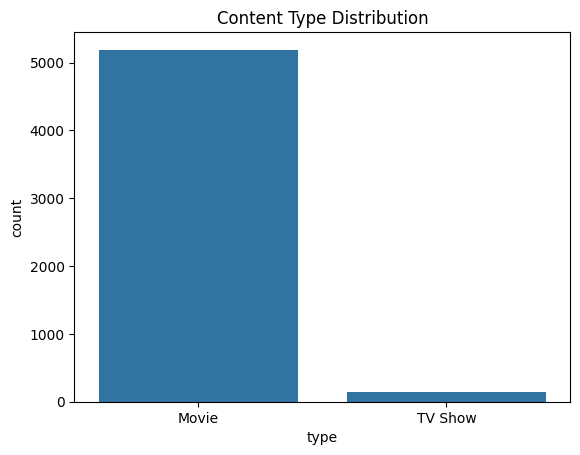

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title('Content Type Distribution')
plt.show()


Content Type Distribution:
Netflix hosts more Movies than TV Shows.

This indicates a stronger focus on one-time-view content rather than episodic content.

Insight: Netflix may prioritize short-form content to keep the catalog fresh and maximize single-session consumption.

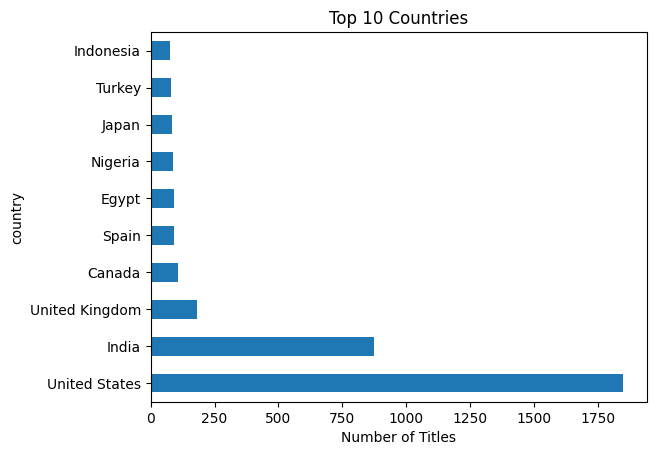

In [11]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries')
plt.xlabel('Number of Titles')
plt.show()


Top 10 Countries by Content:
The majority of content comes from:

United States

India

United Kingdom

A noticeable volume also comes from countries like Canada, Japan, and South Korea.
Insight: Netflix has a diverse catalog, but it heavily leans toward English and Hindi-speaking audiences, reflecting strong presence in North America and South Asia.

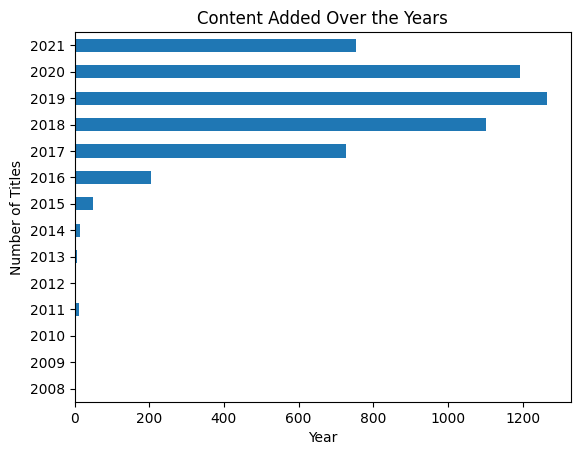

In [12]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='barh')
plt.title('Content Added Over the Years')
plt.ylabel('Number of Titles')
plt.xlabel('Year')
plt.show()


Content Added Over the Years:
There’s a sharp increase in content after 2015, with a peak around 2018–2020.

This aligns with Netflix's international expansion and original content push.

Insight: Netflix significantly ramped up its content library post-2016, likely due to global market penetration and the introduction of Netflix Originals.

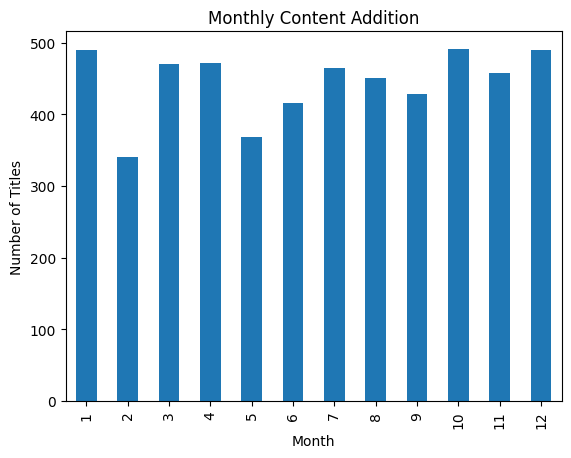

In [16]:
df['month_added'] = df['date_added'].dt.month
df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Monthly Content Addition')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()


Netflix tends to release more new titles at the start and end of the year—especially in January, October, and December. This pattern may align with:

New Year releases (January)

Holiday season and end-of-year content dumps (December)

Fall content ramp-up before awards season (October)

These trends can reflect Netflix's strategy to:

Attract subscribers during key viewing periods

Push seasonal and binge-worthy content during vacation months

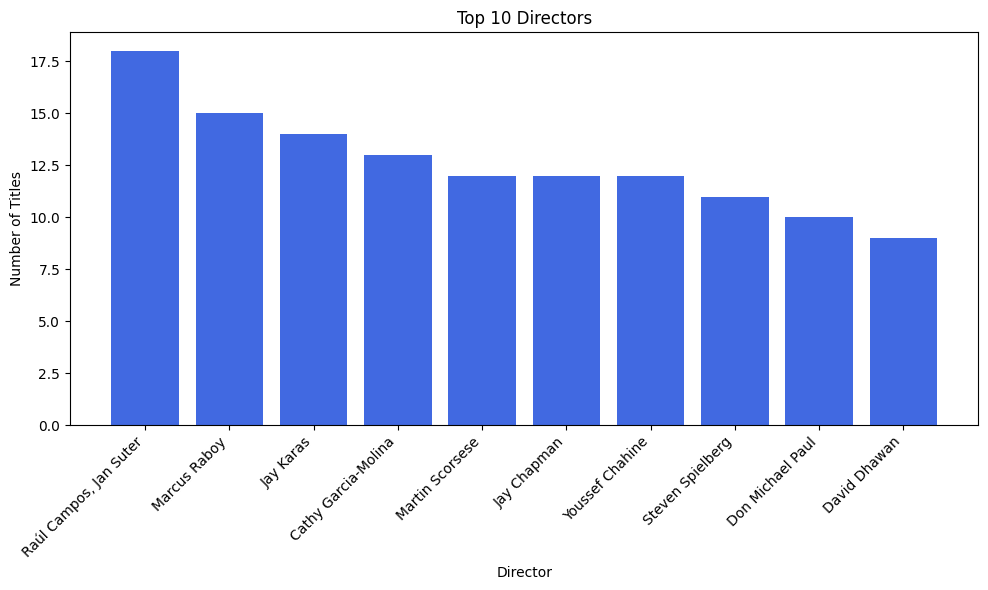

In [13]:
import matplotlib.pyplot as plt

# Get top 10 directors
top_directors = df['director'].value_counts().head(10)

# Plot correctly using plt.bar
plt.figure(figsize=(10, 6))
plt.bar(top_directors.index, top_directors.values, color='royalblue')
plt.title('Top 10 Directors')
plt.ylabel('Number of Titles')
plt.xlabel('Director')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Directors
Directors with the highest number of titles include some notable recurring contributors.

This may indicate Netflix’s partnerships with specific creators for exclusive content.

Insight: Netflix relies on a handful of directors for consistent content delivery, possibly through long-term collaborations.

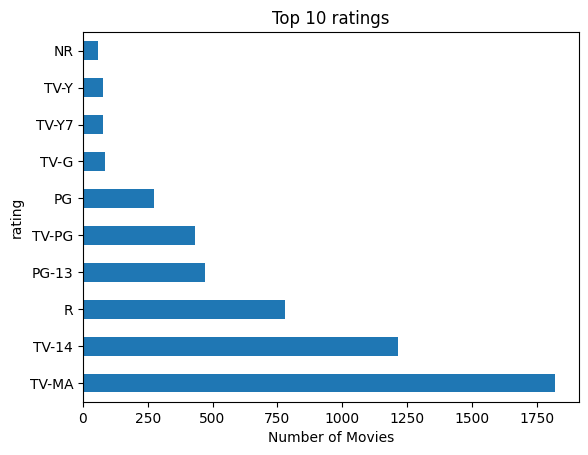

In [14]:
top_rating = df['rating'].value_counts().head(10)
top_rating.plot(kind='barh', title='Top 10 ratings')
plt.xlabel('Number of Movies')
plt.show()



Top 10 Ratings
Ratings like TV-MA, TV-14, and R dominate the content.

This suggests Netflix focuses more on mature audiences rather than younger viewers.

Insight: A large portion of content is rated for teenagers and adults, indicating Netflix’s target demographic.

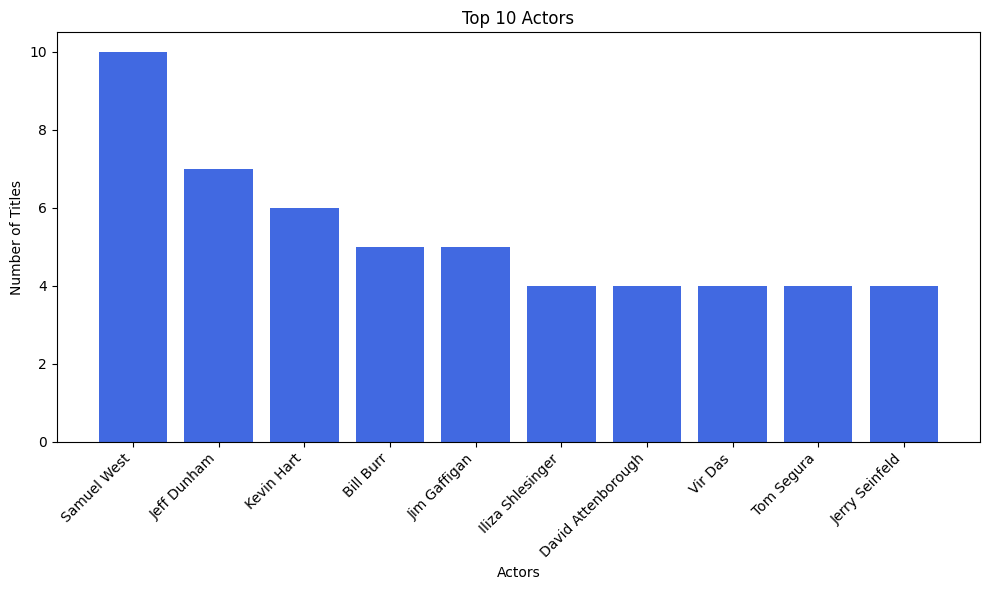

In [15]:
import matplotlib.pyplot as plt

# Get top 10 actors
top_actors = df['cast'].value_counts().head(10)

# Plot correctly using plt.bar
plt.figure(figsize=(10, 6))
plt.bar(top_actors.index, top_actors.values, color='royalblue')
plt.title('Top 10 Actors')
plt.ylabel('Number of Titles')
plt.xlabel('Actors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Actors
The actors with the most appearances likely include Bollywood or Hollywood stars.

These frequent appearances may reflect Netflix’s content partnerships and popular genres (e.g., drama, romance, action).

Insight: Netflix favors casting familiar and bankable actors in multiple shows/movies, boosting user engagement.

In [7]:
# ===============================
# Top 10 Actors + LLM Insights
# ===============================

import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# ---- Top 10 Actors (Correct way) ----
top_actors = (
    df['cast']
    .dropna()
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)

analysis_text_actors = "Top 10 Actors on Netflix:\n"
for actor, count in top_actors.items():
    analysis_text_actors += f"{actor}: {count}\n"

prompt_actors = f"""
You are a senior data analyst.

Convert the following Netflix actor frequency analysis
into clear, professional, executive-level insights
(3–5 bullet points).

Analysis:
{analysis_text_actors}
"""

response_actors = client.responses.create(
    model="gpt-5-nano",
    input=prompt_actors
)

print("LLM INSIGHTS – TOP 10 ACTORS:\n")
print(response_actors.output_text)


LLM INSIGHTS – TOP 10 ACTORS:

- The roster is heavily Indian-dominated (8 of 10), highlighting Netflix’s strong reliance on veteran Indian film/TV talent to attract and retain regional audiences, with fans likely drawn to familiar marquee names.

- The top-10 spread shows no extreme outlier; scores range from 28 to 43, indicating a broad, evenly distributed value from multiple stars rather than a single dominating draw. This suggests a diversified talent strategy rather than “mega-star” dependence.

- The inclusion of two Japanese voice actors (Takahiro Sakurai and Yuki Kaji) alongside Indian stars points to a substantial emphasis on anime and multilingual content, underscoring the importance of localization and cross-cultural appeal in Netflix’s catalog.

- Recommended actions: align star-driven content investments with regional performance data (genre, language, and audience). Consider deeper collaboration with core Indian talent for multi-title campaigns and expand anime localizati

In [8]:
# ===============================
# Top 5 Genres + LLM Insights
# ===============================

# ---- Top 5 Genres ----
top_genres = (
    df['listed_in']
    .dropna()
    .str.split(', ')
    .explode()
    .value_counts()
    .head(5)
)

analysis_text_genres = "Top 5 Genres on Netflix:\n"
for genre, count in top_genres.items():
    analysis_text_genres += f"{genre}: {count}\n"

prompt_genres = f"""
You are a senior data analyst.

Convert the following Netflix genre distribution analysis
into clear, professional, executive-level insights
(3–5 bullet points).

Analysis:
{analysis_text_genres}
"""

response_genres = client.responses.create(
    model="gpt-5-nano",
    input=prompt_genres
)

print("\nLLM INSIGHTS – TOP 5 GENRES:\n")
print(response_genres.output_text)



LLM INSIGHTS – TOP 5 GENRES:

- International content dominates the catalog: International Movies account for about 30% of the top five genres, with Dramas close behind at ~27%. This indicates a strong global demand for non-English content and a strategic imperative to expand international film acquisitions and localization (dubbing/subtitles) to maximize engagement.

- Core scripted content drives rider engagement: Dramas and Comedies together represent roughly 46% of the top genres, underscoring the importance of maintaining a robust, high-quality scripted slate across languages and regions.

- Growth opportunity in international non-scripted and serialized formats: International TV Shows (≈15%) and Documentaries (≈10%) together make up about 25% of the top five, signaling room to scale multi-country TV formats and non-fiction titles to diversify appeal and reduce concentration risk.

- Prioritize localization and discovery optimization: Given the heavy emphasis on international con